# Linear Regression

In [28]:
from si.data.Dataset import Dataset
from si.util.Util import summary
from si.util.Scale import StandardScaler
from si.supervised.LinReg import LinearRegression,LinearRegressionReg
import numpy as np
import os

In [29]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/lr-example1.data')
dataset = Dataset.from_data(filename, labeled = True)
StandardScaler().fit_transform(dataset, inline = True)
summary(dataset)

A          Y
mean  2.987301e-16   5.839135
var   1.000000e+00  30.049970
max   3.647694e+00  24.147000
min  -8.137648e-01  -2.680700

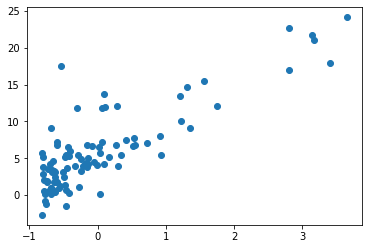

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.Y)
    plt.show()


## Linear Regression using closed form 

In [31]:
lr = LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


In [32]:
idx = 10
x = dataset.X[idx]
print("x = ", x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.9172763535616566
y_true =  3.2522


In [33]:
lr.cost()

4.476971375975178

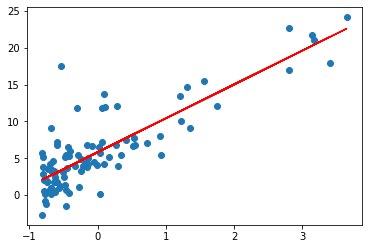

In [34]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.Y)
    plt.plot(lr.X[:, 1], np.dot(lr.X, lr.theta), '-', color = 'red')
    plt.show()


## Linear Regression using gradient descent

In [35]:
lr = LinearRegression(gd = True, epochs = 50000)
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.59304113]


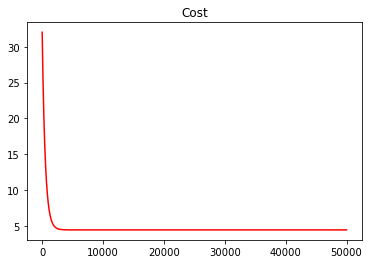

In [36]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color = 'red')
plt.title('Cost')
plt.show()

# Linear Regression with Regularization

In [37]:
lr = LinearRegressionReg()
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.54617337]


In [38]:
idx = 10
x = dataset.X[idx]
print("x = ", x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.947091238234969
y_true =  3.2522


# Logistic Regression

In [39]:
from si.supervised.LogReg import LogisticRegression, LogisticRegressionReg
import pandas as pd

In [40]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df, ylabel = "class")
y = [int(x != 'Iris-setosa') for x in iris.Y]
dataset = Dataset(iris.X.iloc[:,:2],np.array(y))
summary(dataset)

A         B         Y
mean  5.843333  3.054000  0.666667
var   0.681122  0.186751  0.222222
max   7.900000  4.400000  1.000000
min   4.300000  2.000000  0.000000

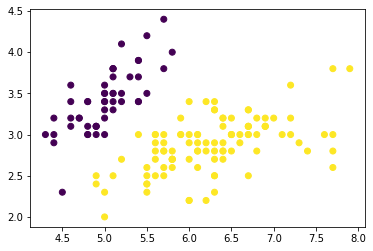

In [41]:
plt.scatter(dataset.X.iloc[:,0], dataset.X.iloc[:,1], c = dataset.Y)
plt.show()

In [42]:
logreg = LogisticRegression(epochs = 20000)

In [43]:
logreg.fit(dataset)
logreg.theta

array([ -4.82595683,   6.87221822, -10.42041025])

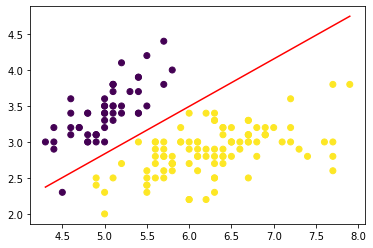

In [44]:
plt.scatter(dataset.X.iloc[:, 0], dataset.X.iloc[:, 1], c = dataset.Y)
_x = np.linspace(min(dataset.X.iloc[:, 0]), max(dataset.X.iloc[:, 0]), 2)
_y = [(-logreg.theta[0] - logreg.theta[1] * x) / logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color = 'red')
plt.show()

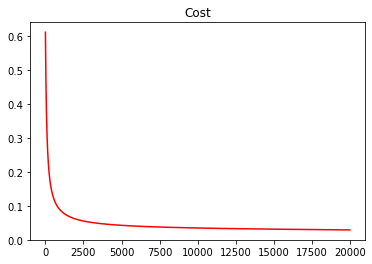

In [45]:
plt.plot(list(logreg.history.keys()), [y[1] for y in logreg.history.values()], '-', color = 'red')
plt.title('Cost')
plt.show()

In [46]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Logistic Regression with L2 regularization

In [47]:
logreg = LogisticRegressionReg()
logreg.fit(dataset)
logreg.theta

array([-0.88465655,  2.34501229, -3.72252587])

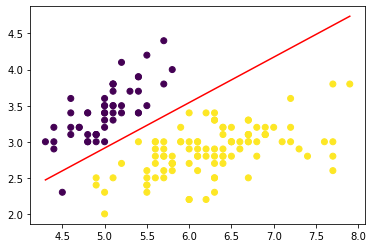

In [48]:
plt.scatter(dataset.X.iloc[:, 0], dataset.X.iloc[:, 1], c = dataset.Y)
_x = np.linspace(min(dataset.X.iloc[:, 0]),max(dataset.X.iloc[:,  0]), 2)
_y = [(-logreg.theta[0] - logreg.theta[1] * x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color = 'red')
plt.show()

In [49]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))

Pred. example: 1


# Cross-validation

In [50]:
from si.data.Dataset import Dataset
from si.util.CV import CrossValidation
from si.supervised.LogReg import LogisticRegression

In [51]:
logreg = LogisticRegression(epochs = 1000)
cv = CrossValidation(logreg, Dataset, cv = 5)
cv.run()
cv.toDataFrame()

AttributeError: type object 'Dataset' has no attribute 'X'

# Grid Search with Cross-Validation

In [52]:
from si.util.CV import GridSearchCV

In [ ]:
parameters = {'epochs': [100, 200, 400, 800, 1000], 'lr': [0, 0.2, 0.4, 0.8]}
gs = GridSearchCV(logreg, dataset, parameters, cv = 3, split = 0.5)
gs.run()
gs.toDataframe()